<a href="https://colab.research.google.com/github/cheatham1/BackUp/blob/main/Plot_EU_JAV_VaccineStance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 7
myfsize = 17

In [ ]:
!pip install --upgrade transformers
!pip install sentencepiece

import numpy as np
import pandas as pd
import json

import torch

from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import pipeline


# New Section

In [ ]:
#model_name = "Cheatham/xlm-roberta-large-finetuned"
#model_name = "Cheatham/xlm-roberta-large-finetuned3" #trained dataset1&2
model_name = "Cheatham/xlm-roberta-large-finetuned4" #trained dataset1&2
#model_name = "Cheatham/xlm-roberta-base-finetuned"   #trained dataset1&2

#model_name = "Cheatham/xlm-roberta-large-finetuned-d1"  #just trained dataset1


In [ ]:
config = AutoConfig.from_pretrained(model_name)

#model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)
model = XLMRobertaForSequenceClassification.from_pretrained(model_name, config=config)

tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)


Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/238 [00:00<?, ?B/s]

In [ ]:
!ls

sample_data


In [ ]:
#test_data = pd.read_csv(
    #dataset1 test
    #'https://raw.githubusercontent.com/cheatham1/EU-JAV-DATA/main/july_test_3categories_2.csv',

    #dataset2 test
    #'https://raw.githubusercontent.com/cheatham1/EU-JAV-DATA/main/no_replies_no_mentions_oct_test_3categories_2.csv',

  #  names=["label", "text"]

    # TOTAL dataset2 with dates
    #'https://raw.githubusercontent.com/cheatham1/EU-JAV-DATA/main/no_replies_no_mentions_date_oct_3categories.csv',
    #names=["label", "text","YMD", "month"]
#)

data1 = pd.read_csv('https://raw.githubusercontent.com/cheatham1/EU-JAV-DATA/main/no_replies_no_mentions_dataset1_5categories.csv',
     names=["label", "text"]
)

data2 = pd.read_csv('https://raw.githubusercontent.com/cheatham1/EU-JAV-DATA/main/no_replies_no_mentions_dataset2_5categories.csv',
      names=["label", "text"]
)

data = data1.append(data2)

# just look at ambiguous
#test_data = data[ data['label'] == 3 ]

# just look at indiscernable
test_data = data[ data['label'] == 4 ]

In [ ]:
df_labels1 = data1['label'].tolist()
df_labels2 = data2['label'].tolist()

In [ ]:
count1 = data1.groupby(['label']).count()
count2 = data2.groupby(['label']).count()

In [ ]:
count1

,text
label,
0,421
1,382
2,498
3,31
4,46


Text(0.5, 1.0, 'Indicernable Tweets: Stance Analysis Labelled Data')

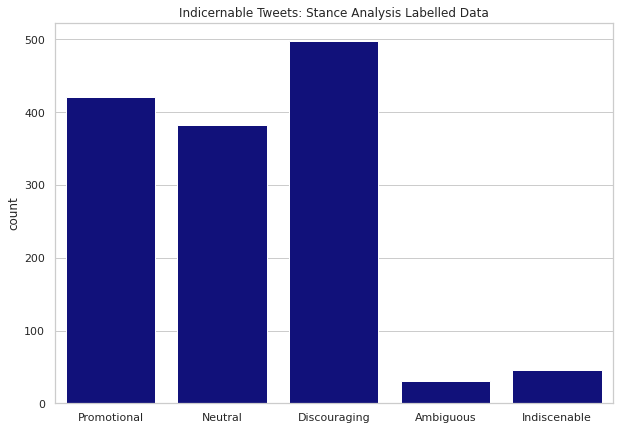

In [ ]:
p = sns.countplot(x=df_labels1, color=p = sns.countplot(x=df_labels1, color='darkblue')
)
p.set_title("Dataset1: Stance Analysis Labelled Data")
p.set_xticklabels(["Promotional","Neutral","Discouraging","Ambiguous","Indiscenable"])
p.set_title("Indicernable Tweets: Stance Analysis Labelled Data")

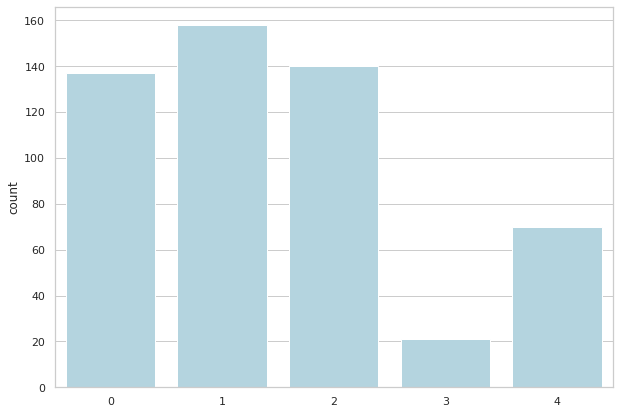

In [ ]:
p = sns.countplot(x=df_labels2, color='lightblue')


In [ ]:
test_data.head(2)

In [ ]:
test_data.text.iloc[1]

'"non ti bacio perch� ho l\'influenza! " "ma io ho fatto il vaccino" ???? poetic cinema #uominiedonne'

In [ ]:
X_test = list(test_data["text"])

In [ ]:
len(X_test)

116

In [ ]:
test_data.head()

,label,text
33,4,"""ma le fasce a rischio si tutelano! c'è il vac..."
37,4,"""non ti bacio perch� ho l'influenza! "" ""ma io ..."
83,4,"user_ansa allora vi spiego, funziona come l'ap..."
115,4,"user user user user user dott porro, la prego,..."
123,4,user gli #illuminati odiano chi oscura la loro...


In [ ]:
test_data.dtypes

label     int64
text     object
dtype: object

## EU-JAVA transformer model
## Classification of tweets for vaccine stance

In this notebook we will use a transformer model for sequence classification we have finetuned on Italian tweets


In [ ]:
classifier = pipeline( task="text-classification"  , model=model, tokenizer=tokenizer, config=config)

In [ ]:
classifier(["avviso vaccino antinfluenzale 2018-19. come il mercurio causa processi neurodegenerativi cerebrali link"])

[{'label': 'LABEL_2', 'score': 0.9994996786117554}]

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
import time


In [ ]:
#@njit(parallel=True)

import multiprocessing
from multiprocessing import Process, Value

In [ ]:
t1 = time.perf_counter()

pred_label = []
#for out in tqdm(classifier(X_test)):
for out in classifier(X_test):
    pred_label.append(out)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)


time taken to run: 93.33135429499998


In [ ]:
len(pred_label)

116

In [ ]:
pred_label[:10]

[{'label': 'LABEL_0', 'score': 0.9996320009231567},
 {'label': 'LABEL_0', 'score': 0.9984638690948486},
 {'label': 'LABEL_1', 'score': 0.9914611577987671},
 {'label': 'LABEL_1', 'score': 0.9957504272460938},
 {'label': 'LABEL_0', 'score': 0.9996209144592285},
 {'label': 'LABEL_2', 'score': 0.9449098110198975},
 {'label': 'LABEL_0', 'score': 0.9983489513397217},
 {'label': 'LABEL_0', 'score': 0.4991341233253479},
 {'label': 'LABEL_1', 'score': 0.9961555600166321},
 {'label': 'LABEL_0', 'score': 0.9988646507263184}]

In [ ]:
labels = []
for pred in pred_label:
    labels.append(pred["label"])


In [ ]:
int_labels = []

for string in labels:
    int_label = string.replace("LABEL_", "")
    int_label = int(int_label)
    int_labels.append(int_label)

In [ ]:
int_labels[:10]

[0, 0, 1, 1, 0, 2, 0, 0, 1, 0]

In [ ]:
int_labels

[0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0]

[Text(0, 0, 'Promotional'), Text(0, 0, 'Neutral'), Text(0, 0, 'Discouraging')]

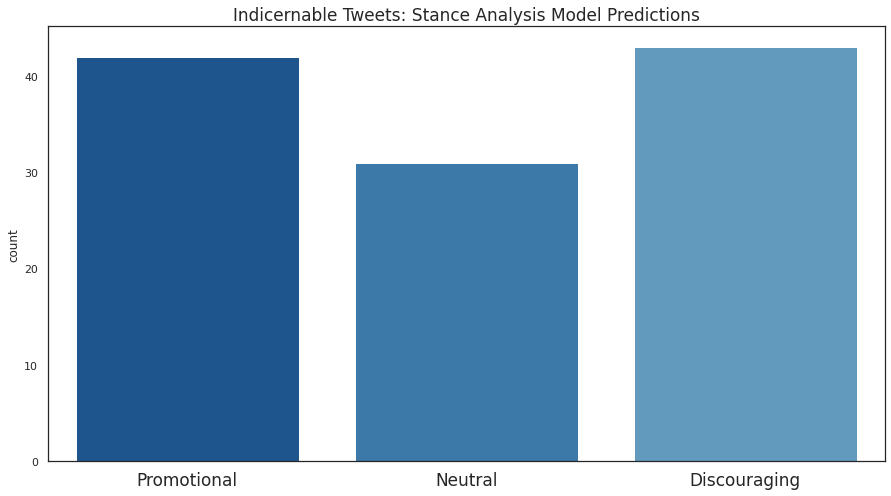

In [ ]:
sns.set_palette("Blues_r")
p = sns.countplot(x=int_labels)
#p.set_title("Dataset2: Stance Analysis Model Predictions",fontsize=myfsize)
p.set_title("Indicernable Tweets: Stance Analysis Model Predictions",fontsize=myfsize)
p.set_xticklabels(["Promotional","Neutral","Discouraging"],fontsize=myfsize)

In [ ]:
X_true_labels = list(test_data["label"])

In [ ]:
X_true_labels[:10]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

[Text(0, 0, 'Promotional')]

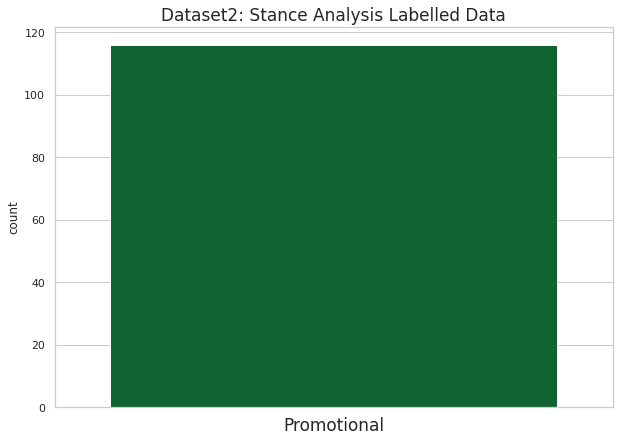

In [ ]:
sns.set_palette("Greens_r")
p = sns.countplot(x= X_true_labels)
p.set_title("Dataset2: Stance Analysis Labelled Data",fontsize=myfsize)
p.set_xticklabels(["Promotional","Neutral","Discouraging"],fontsize=myfsize)

In [ ]:
test = test_data.copy()
test["prediction"] = np.array(int_labels)

In [ ]:
test

,label,text,prediction
33,4,"""ma le fasce a rischio si tutelano! c'è il vac...",0
37,4,"""non ti bacio perch� ho l'influenza! "" ""ma io ...",0
83,4,"user_ansa allora vi spiego, funziona come l'ap...",1
115,4,"user user user user user dott porro, la prego,...",1
123,4,user gli #illuminati odiano chi oscura la loro...,0
...,...,...,...
482,4,user user non solo gli usa. avevo visto un art...,1
489,4,"user user vero, ma hanno chiuso dentro le pers...",2
492,4,user_it vaccino per i preti,1
503,4,tieni il tempo #vaccini link,0


In [ ]:
predicted_promotional = test.text[ test['prediction'] == 0 ]
predicted_neutral = test.text[ test['prediction'] == 1 ]
predicted_discouraging = test.text[ test['prediction'] == 2 ]

In [ ]:
pd.set_option('display.max_colwidth', 400)

In [ ]:
print(predicted_promotional.to_string(index=False))

                                                                                                                                                                               "ma le fasce a rischio si tutelano! c'è il vaccino"\n\nche fa solo il 53,1% della popolazione a rischio.\n\nvogliamo ancora prenderci in giro?\n\n5/ link
                                                                                                                                                                                                                                     "non ti bacio perch� ho l'influenza! " "ma io ho fatto il vaccino" ???? poetic cinema #uominiedonne
                                                                                                                                                                                                                                              user gli #illuminati odiano chi oscura la loro luce !\n#dedonno\n#si #sieroterapia\n#novax
             

In [ ]:
print(predicted_neutral.to_string(index=False))

user_ansa allora vi spiego, funziona come l'app sviluppata in cina che è facoltativa scaricare e segnalarsi se hai virus, ma se non lo fai non puoi entrare in nessun negozio perché vogliono il risultato dell'app. ecco  il vaccino se non lo farai non ti faranno accedere a scuola o altro.
                                                                                                                                                          user user user user user dott porro, la prego, mi risponda, un semplice si o un semplice no, lei ha fatto il vaccino antinfluenzale ?
                                                                                                                                                                                                                      ++++++breaking news++++++\nuser ha appena trovato il vaccino per il covid
                                                                                                                                        

In [ ]:
print(predicted_discouraging.to_string(index=False))

                                  user io mi vaccino. \nma se davanti a me lo fanno, tanto per cominciare,\n#burloni, #fazzio, #galli, #arcuri, #borrelli, #brusaferro e ovviamente i maggiori responsabili  #gonte e #mottarello.\nde giggino non me ne frega #nabibbita.\n'ndo devo firmà???
                                                                                                                                                                                                      bill gates e vaccino con `microchip tatuato`/ torna bufala su `patente di immunità` link
                                                                                                                                                                                                 diceva che l’epidemia fosse un’invenzione con la conseguente creazione di un vaccino inutile.
                                                                                                                                           

In [ ]:
# Compute confusion matrix
#import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set_theme(style="white", palette=None)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8
myfont_size = 18

In [ ]:
confusion_matrix(int_labels, X_true_labels)

array([[ 0,  0,  0, 42],
       [ 0,  0,  0, 31],
       [ 0,  0,  0, 43],
       [ 0,  0,  0,  0]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=myfont_size)

    plt.tight_layout()
    plt.ylabel('Predicted label',fontsize=myfont_size)
    plt.xlabel('True label',fontsize=myfont_size)

Confusion matrix, without normalization
[[ 0  0  0 42]
 [ 0  0  0 31]
 [ 0  0  0 43]
 [ 0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Normalized confusion matrix
[[ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [nan nan nan nan]]


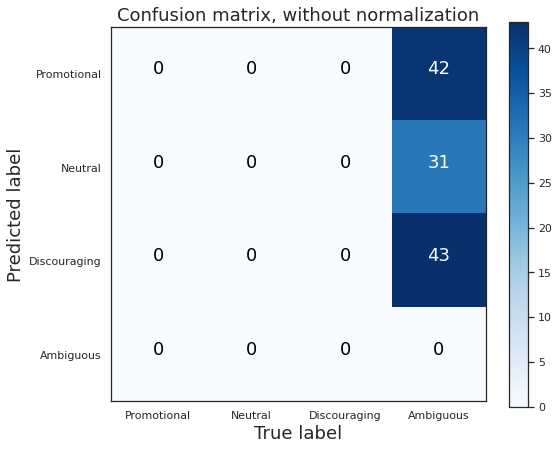

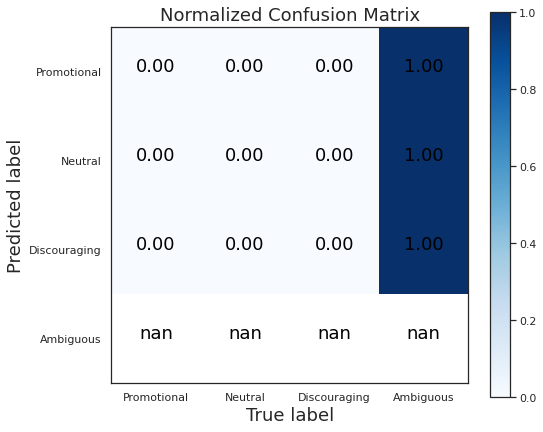

In [ ]:
import itertools
#class_names= ["Promotional","Neutral","Discouraging"]
class_names= ["Promotional","Neutral","Discouraging","Ambiguous"]

cnf_matrix = confusion_matrix(int_labels, X_true_labels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion matrix, without normalization',fontsize=myfont_size)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.title('Normalized Confusion Matrix',fontsize=myfont_size)

plt.tight_layout()
#plt.savefig("ConfusionMatrix.png")
plt.show()

In [ ]:
test_data["Prediction"] = int_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data.head(10)

,label,text,Prediction
33,4,"""ma le fasce a rischio si tutelano! c'è il vaccino""\n\nche fa solo il 53,1% della popolazione a rischio.\n\nvogliamo ancora prenderci in giro?\n\n5/ link",0
37,4,"""non ti bacio perch� ho l'influenza! "" ""ma io ho fatto il vaccino"" ???? poetic cinema #uominiedonne",0
83,4,"user_ansa allora vi spiego, funziona come l'app sviluppata in cina che è facoltativa scaricare e segnalarsi se hai virus, ma se non lo fai non puoi entrare in nessun negozio perché vogliono il risultato dell'app. ecco il vaccino se non lo farai non ti faranno accedere a scuola o altro.",1
115,4,"user user user user user dott porro, la prego, mi risponda, un semplice si o un semplice no, lei ha fatto il vaccino antinfluenzale ?",1
123,4,user gli #illuminati odiano chi oscura la loro luce !\n#dedonno\n#si #sieroterapia\n#novax,0
338,4,"user io mi vaccino. \nma se davanti a me lo fanno, tanto per cominciare,\n#burloni, #fazzio, #galli, #arcuri, #borrelli, #brusaferro e ovviamente i maggiori responsabili #gonte e #mottarello.\nde giggino non me ne frega #nabibbita.\n'ndo devo firmà???",2
408,4,#lariachetirala7..ipocrita.. user ipocrita..cosa centra il novax.. hai fatto trasmissioni a dire di non fare allarmismo.. di continuare la vita normale a deridere chi chiedeva più controlli.. ora dite il contrario.. a user siete delle banderuole #virus #coronavirus,0
413,4,#miami #italia #mondooggi #covid #diabete #scienza #ricercatori #vaccino #farmaci antidiabetici contro il covid? link link,0
444,4,++++++breaking news++++++\nuser ha appena trovato il vaccino per il covid,1
456,4,5g corona\n\ncol vaccino antinfluenzale curiamo il covid-19.,0


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 8
#myfsize = 17


discouraging_colour= "#fc7d0b"
neutral_colour = "#86B049"
promotional_colour = "#1170aa"

colours_3 = [promotional_colour,neutral_colour,discouraging_colour]

stance_colours_3 = np.array([promotional_colour,
                             neutral_colour,
                             discouraging_colour,
                            ])
cmap_stance = matplotlib.colors.LinearSegmentedColormap.from_list("", stance_colours_3 )


In [ ]:
grouped_df = test_data.groupby(['month', 'label']).size().reset_index(name="Count")
sub_df = grouped_df.groupby(['month','label'])['Count'].sum().unstack()

sub_df.columns = ("promotional", "neutral", "discouraging")

KeyError: ignored

In [ ]:
#plt.style.use('ggplot')
sns.set_theme(style="white", palette=None)

p = sub_df.plot(kind='bar', stacked=True, cmap=cmap_stance )

p.set_xticklabels(('Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep'))
p.tick_params(labelsize=myfsize)

p.set_title('EU_JAV: Stance Tweet Count After Cleaning: Feb - Sept 2021',fontsize=myfsize)

p.set_xlabel("Month 2021",fontsize=myfsize, labelpad=20)
p.set_ylabel("Number of Tweets",fontsize=myfsize)
p.legend(fontsize='x-large')

fig = p.get_figure()

In [ ]:
sub_df_percent = sub_df.copy()
sub_df_percent['total'] = sub_df_percent.promotional + sub_df_percent.neutral + sub_df_percent.discouraging
sub_df_percent['promotional']= sub_df_percent['promotional']/sub_df_percent['total']
sub_df_percent['neutral']= sub_df_percent['neutral']/sub_df_percent['total']
sub_df_percent['discouraging']= sub_df_percent['discouraging']/sub_df_percent['total']
sub_df_percent.drop('total', axis=1, inplace=True)

In [ ]:
sub_df_percent

In [ ]:
p = sub_df_percent.plot(kind='bar', stacked=True, cmap=cmap_stance)

p.set_xticklabels(('Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep'))
p.tick_params(labelsize=myfsize)

p.set_title('EU_JAV: Stance Tweet Count After Cleaning: Feb - Sept 2021',fontsize=myfsize)

p.set_xlabel("Month",fontsize=myfsize, labelpad=20)
p.set_ylabel("Normalised Number of Monthly Tweets",fontsize=myfsize)
p.legend(fontsize='x-large')


fig = p.get_figure()

In [ ]:
grouped_df_2 = test_data.groupby(['month', 'Prediction']).size().reset_index(name="Count")
sub_df_2 = grouped_df_2.groupby(['month','Prediction'])['Count'].sum().unstack()

sub_df_2.columns = ("promotional", "neutral", "discouraging")

In [ ]:
p_2 = sub_df_2.plot(kind='bar', stacked=True, cmap=cmap_stance )

p_2.set_xticklabels(('Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep'))
p_2.tick_params(labelsize=myfsize)

p_2.set_title('EU_JAV: Stance Prediction: Feb - Sept 2021',fontsize=myfsize)

p_2.set_xlabel("Month",fontsize=myfsize, labelpad=20)
p_2.set_ylabel("Number of Tweets",fontsize=myfsize)
p_2.legend(fontsize='x-large')

#fig = p.get_figure()
fig = p_2.get_figure()

In [ ]:
sub_df_2_percent = sub_df_2.copy()
sub_df_2_percent['total'] = sub_df_2_percent.promotional + sub_df_2_percent.neutral + sub_df_2_percent.discouraging
sub_df_2_percent['promotional']= sub_df_2_percent['promotional']/sub_df_2_percent['total']
sub_df_2_percent['neutral']= sub_df_2_percent['neutral']/sub_df_2_percent['total']
sub_df_2_percent['discouraging']= sub_df_2_percent['discouraging']/sub_df_2_percent['total']
sub_df_2_percent.drop('total', axis=1, inplace=True)

In [ ]:
sub_df_2_percent

In [ ]:
p2 = sub_df_2_percent.plot(kind='bar', stacked=True, cmap=cmap_stance)

p2.set_xticklabels(('Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep'))
p2.tick_params(labelsize=myfsize)

p2.set_title('EU_JAV: Stance Prediction: Feb - Sept 2021',fontsize=myfsize)

p2.set_xlabel("Month",fontsize=myfsize, labelpad=20)
p2.set_ylabel("Normalised Number of Monthly Tweets",fontsize=myfsize)
p2.legend(fontsize='x-large')


fig = p2.get_figure()

In [ ]:
fig = p.get_figure()

In [ ]:
sub_df

In [ ]:
sub_df.columns

In [ ]:
sub_df_2

In [ ]:
fig, ax = plt.subplots()

#ax.plot(sub_df)
#sub_df_2.plot(ax=ax)


ax.plot(sub_df)
sub_df_2.plot(ax=ax)


plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(sub_df, linewidth=4)
ax.plot(sub_df_2, linewidth=2, linestyle='dashed')

plt.show()

In [ ]:

ax = sub_df.plot(kind='bar', cmap=cmap_stance )
sub_df_2.plot(ax= ax, kind='line', cmap=cmap_stance )


#plt.show()
